In [549]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

### read in data

In [550]:
df = pd.read_csv('../metadata/metadata_cleaned_wes.csv')
df

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_5epsilon_pca,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo
0,1000224,1.0,1.0,435500.0,387500.0,Sheffield,England,0.000420,-0.000268,0.000011,...,True,True,True,True,False,18384.776311,False,True,True,True
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,True,False,44777.226354,False,True,True,True
2,1000482,0.0,1.0,337500.0,391500.0,Liverpool,England,-0.000078,0.000076,-0.001317,...,True,True,True,True,False,81743.501271,False,False,True,True
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,True,False,64536.811201,False,False,True,True
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,True,False,93434.469014,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469771,6023516,1.0,0.0,459500.0,451500.0,Reading,England,NaN,NaN,NaN,...,True,True,True,True,False,81987.803971,False,False,True,True
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,True,False,54451.813560,False,False,True,True
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,True,False,132015.150646,False,False,False,True
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,True,False,163085.866954,False,False,False,True


In [551]:
# subsample to individuals (1) with birthplace in UK data (2) meeting QC and (3) within 1eps PCA
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere']!='Elsewhere') & (df['used_in_pca']==1) & (df['within_1epsilon_pca']==True)]

In [552]:
df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_5epsilon_pca,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,True,False,44777.226354,False,True,True,True
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,True,False,64536.811201,False,False,True,True
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,True,False,93434.469014,False,False,True,True
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,True,True,True,False,74060.785845,False,False,True,True
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,True,True,True,False,47201.694885,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,True,True,True,False,245979.673957,False,False,False,True
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,True,False,54451.813560,False,False,True,True
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,True,False,132015.150646,False,False,False,True
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,True,False,163085.866954,False,False,False,True


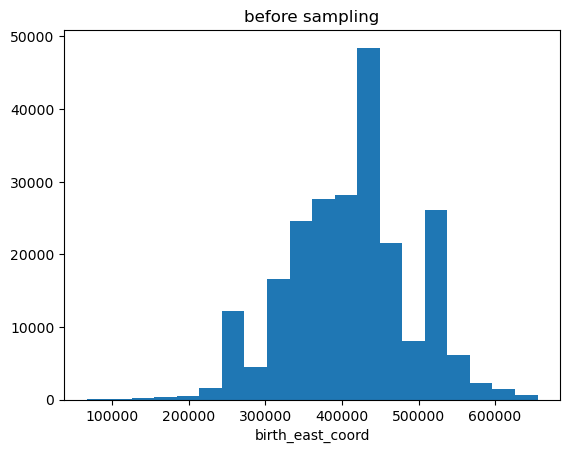

In [553]:
plt.hist(df_geo['birth_east_coord'],bins=20)
plt.xlabel('birth_east_coord')
plt.title('before sampling')
plt.show()

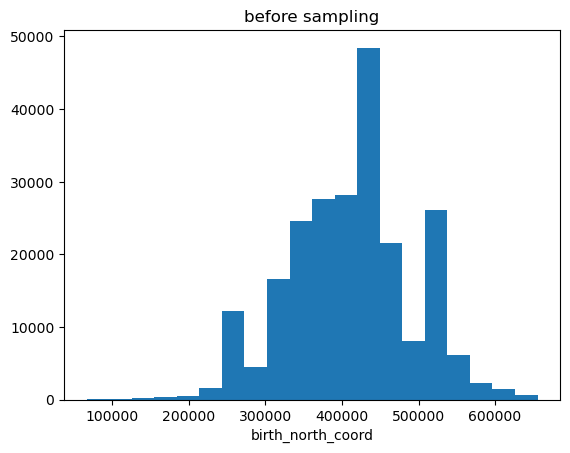

In [554]:
plt.hist(df_geo['birth_east_coord'],bins=20)
plt.title('before sampling')
plt.xlabel('birth_north_coord')
plt.show()

### hex bins

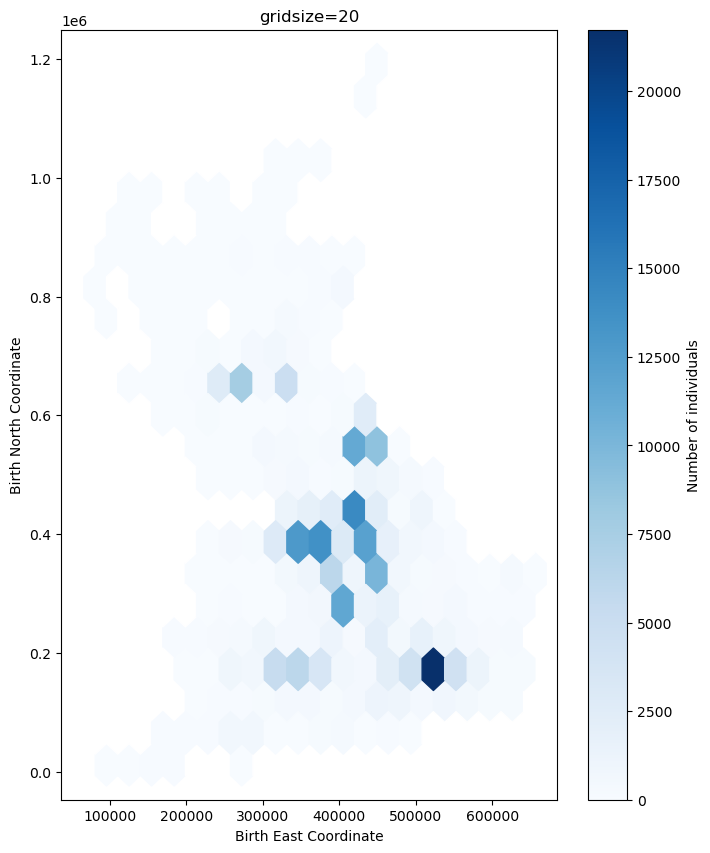

In [556]:
plt.figure(figsize=(8, 10)) 
cmap = plt.cm.Blues
cmap.set_under('white')
gs=20

hb = plt.hexbin(df_geo['birth_east_coord'], df_geo['birth_north_coord'], 
                gridsize=gs, cmap=cmap, vmin=1e-8)

cb = plt.colorbar(hb, label='Number of individuals')

plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.title(f'gridsize={gs}')
plt.show()

In [557]:
len(df_geo)

231073

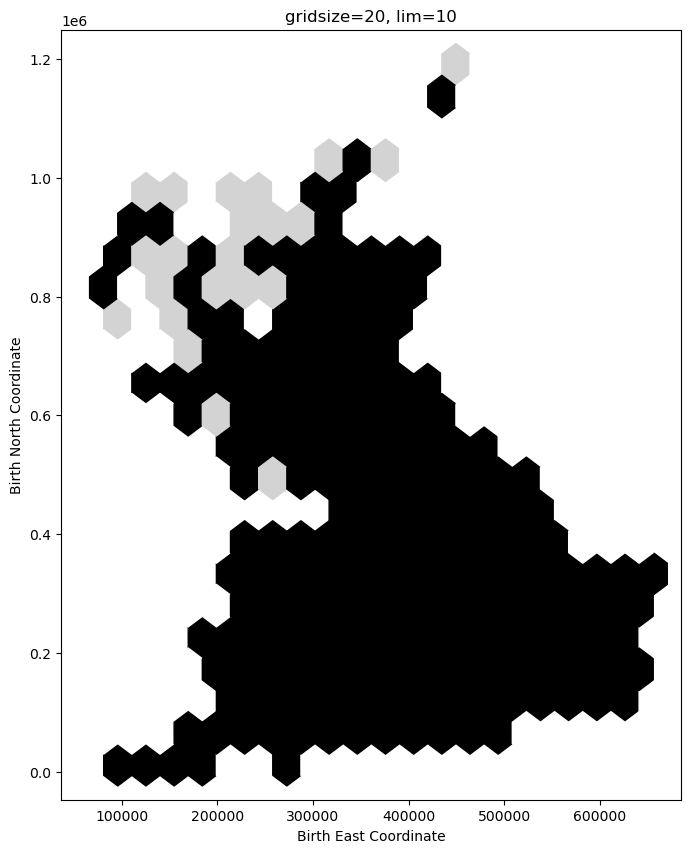

In [558]:
cmap = mcolors.ListedColormap(['lightgrey', 'black'])

plt.figure(figsize=(8, 10)) 
# cmap = plt.cm.Blues
cmap.set_under('white')
gs=20
lim=10
hb_bin = plt.hexbin(df_geo['birth_east_coord'], df_geo['birth_north_coord'], 
                gridsize=gs, cmap=cmap,vmin=1e-8,vmax=lim)
# cb = plt.colorbar(hb, label='Number of individuals')

plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.title(f'gridsize={gs}, lim={lim}')
plt.show()

In [ ]:
# hexbins not able to map well... moving to grid

### rectangular grid

In [559]:
df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_5epsilon_pca,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,True,False,44777.226354,False,True,True,True
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,True,False,64536.811201,False,False,True,True
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,True,False,93434.469014,False,False,True,True
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,True,True,True,False,74060.785845,False,False,True,True
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,True,True,True,False,47201.694885,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,True,True,True,False,245979.673957,False,False,False,True
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,True,False,54451.813560,False,False,True,True
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,True,False,132015.150646,False,False,False,True
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,True,False,163085.866954,False,False,False,True


In [560]:
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6142/3213988105.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df_geo.iloc[:,3:5].median()[0],df_geo.iloc[:,3:5].median()[1],c='red',marker='*') # centroid


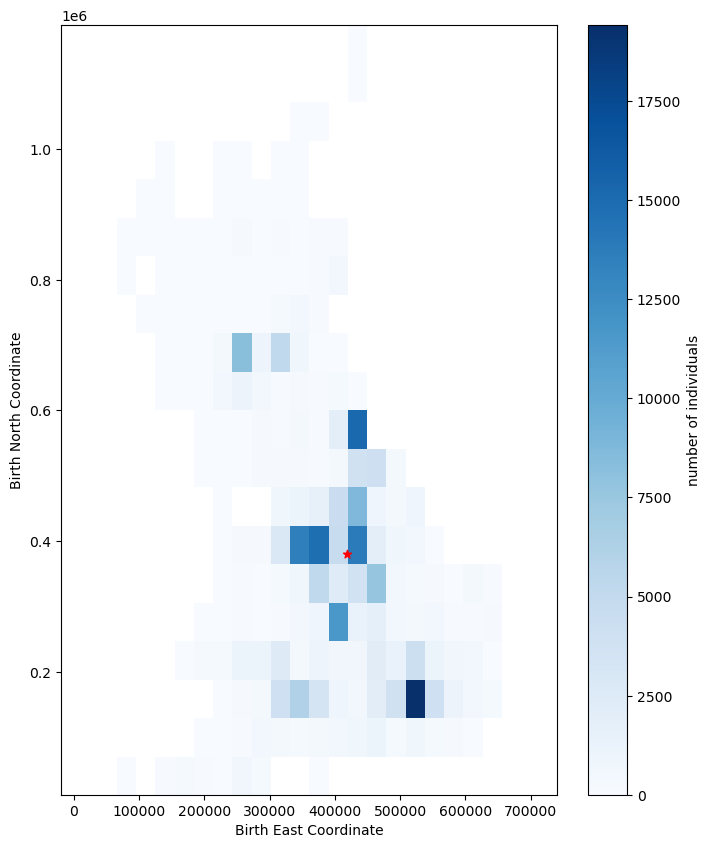

In [562]:
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plt.figure(figsize=(8, 10))
plt.imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.colorbar(label='number of individuals') 
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.scatter(df_geo.iloc[:,3:5].median()[0],df_geo.iloc[:,3:5].median()[1],c='red',marker='*') # centroid
plt.show()

In [563]:
max(counts.flatten())

19425.0

In [564]:
len(counts.flatten())

400

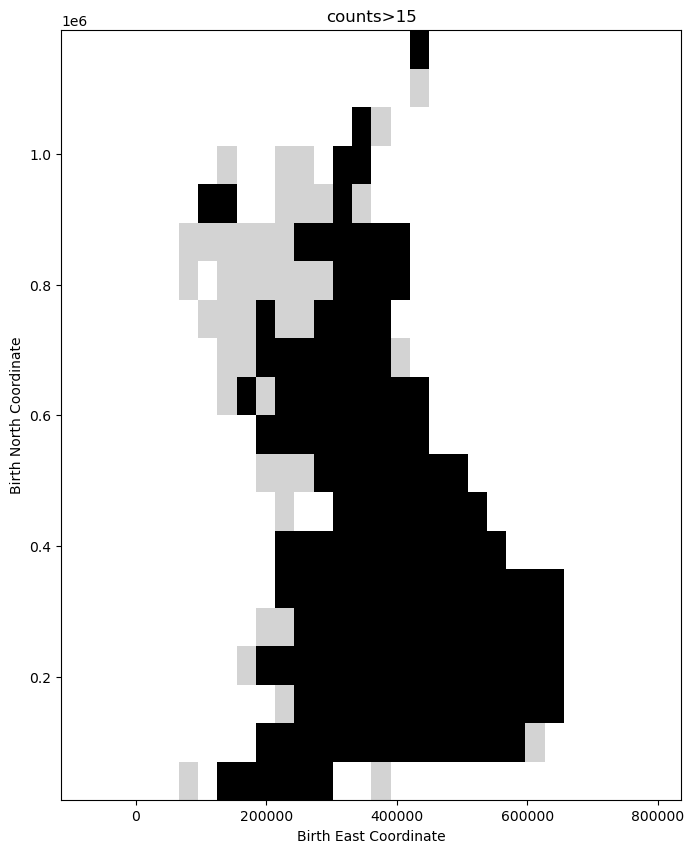

In [565]:
masked_counts = np.where(counts == 0, 0, np.where(counts > 15, 2, 1))
cmap = ListedColormap(['white', 'lightgrey', 'black'])

plt.figure(figsize=(8, 10))
plt.imshow(masked_counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
# plt.colorbar(label='number of individuals') 
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.title('counts>15')
plt.show()
# note colorbar off - uses binary values from masked

In [566]:
# counts

In [567]:
df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_5epsilon_pca,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,True,False,44777.226354,False,True,True,True
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,True,False,64536.811201,False,False,True,True
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,True,False,93434.469014,False,False,True,True
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,True,True,True,False,74060.785845,False,False,True,True
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,True,True,True,False,47201.694885,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,True,True,True,False,245979.673957,False,False,False,True
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,True,False,54451.813560,False,False,True,True
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,True,False,132015.150646,False,False,False,True
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,True,False,163085.866954,False,False,False,True


In [568]:
def get_count(x,y,counts,xedges,yedges):
    x_bin_index = np.digitize(x, xedges) - 1  
    y_bin_index = np.digitize(y, yedges) - 1
    
    x_bin_index = np.clip(x_bin_index, 0, counts.shape[0] - 1)
    y_bin_index = np.clip(y_bin_index, 0, counts.shape[1] - 1)
    
    return counts[x_bin_index, y_bin_index]



In [569]:
get_count(457500.0,402500.0,counts,xedges,yedges)

1911.0

In [570]:
df_geo['binned_counts'] = df.apply(lambda row: get_count(row['birth_east_coord'],row['birth_north_coord'],counts,xedges,yedges),axis=1)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6142/605446537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['binned_counts'] = df.apply(lambda row: get_count(row['birth_east_coord'],row['birth_north_coord'],counts,xedges,yedges),axis=1)


In [571]:
df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo,binned_counts
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,False,44777.226354,False,True,True,True,1911.0
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,False,64536.811201,False,False,True,True,14791.0
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,False,93434.469014,False,False,True,True,11632.0
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,True,True,False,74060.785845,False,False,True,True,13493.0
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,True,True,False,47201.694885,False,True,True,True,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,True,True,False,245979.673957,False,False,False,True,662.0
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,False,54451.813560,False,False,True,True,7685.0
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,False,132015.150646,False,False,False,True,204.0
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,False,163085.866954,False,False,False,True,3806.0


### plot results of binning

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6142/2638525265.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df_geo.iloc[:,3:5].median()[0],df_geo.iloc[:,3:5].median()[1],c='red',marker='*')


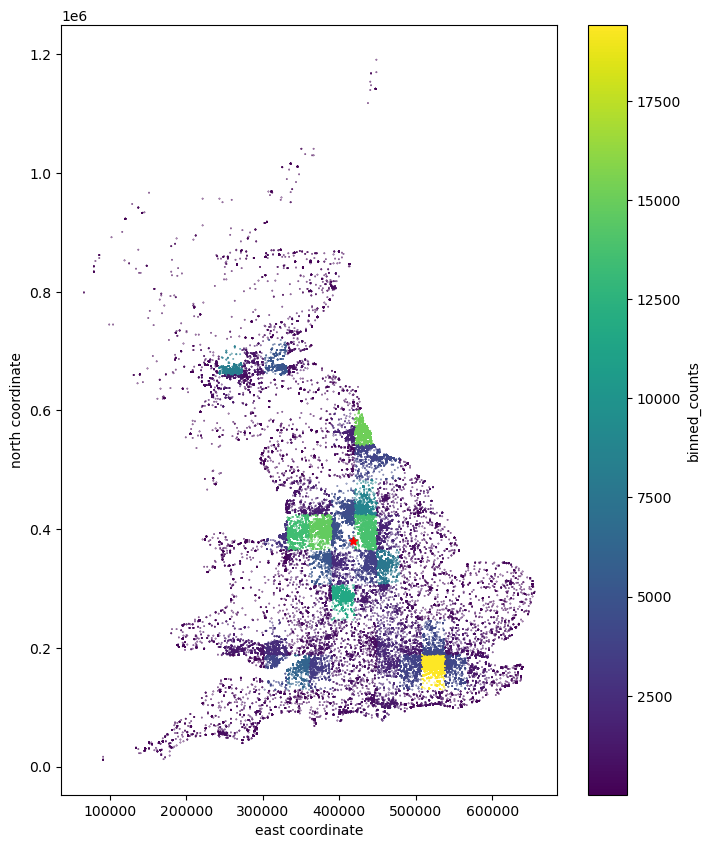

In [572]:
plt.figure(figsize=(8,10))
scatter = plt.scatter(x=df_geo['birth_east_coord'],y=df_geo['birth_north_coord'],c=df_geo['binned_counts'],alpha=1,s=0.1)
plt.xlabel('east coordinate')
plt.ylabel('north coordinate')
# plt.scatter(532000,182000,s=100,c='red',marker='X')
cbar = plt.colorbar(scatter, label='binned_counts')
plt.scatter(df_geo.iloc[:,3:5].median()[0],df_geo.iloc[:,3:5].median()[1],c='red',marker='*')
plt.show()

### sampling with SIR - unif

In [573]:
N=len(df_geo)
n=10000

df_geo['freq_binned']=df_geo['binned_counts']/N
df_geo['IS_weights_unif']=1/df_geo['freq_binned']

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6142/3304002569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['freq_binned']=df_geo['binned_counts']/N
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6142/3304002569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['IS_weights_unif']=1/df_geo['freq_binned']


In [448]:
# df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo,binned_counts,freq_binned,IS_weights_unif
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,False,44777.226354,False,True,True,True,1911.0,0.008270,120.917321
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,False,64536.811201,False,False,True,True,14791.0,0.064010,15.622541
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,False,93434.469014,False,False,True,True,11632.0,0.050339,19.865285
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,False,74060.785845,False,False,True,True,13493.0,0.058393,17.125398
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,False,47201.694885,False,True,True,True,3664.0,0.015856,63.065775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,False,245979.673957,False,False,False,True,662.0,0.002865,349.052870
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,False,54451.813560,False,False,True,True,7685.0,0.033258,30.068055
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,False,132015.150646,False,False,False,True,204.0,0.000883,1132.710784
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,False,163085.866954,False,False,False,True,3806.0,0.016471,60.712822


In [574]:
samp_geo = df_geo.sample(n=n,replace=True,weights='IS_weights_unif',random_state=0)

In [575]:
samp_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo,binned_counts,freq_binned,IS_weights_unif
252871,2953914,1.0,1.0,336500.0,950500.0,Glasgow,Scotland,0.000364,-0.000131,0.000154,...,True,False,575868.040440,False,False,False,False,2.0,0.000009,115536.500000
328938,4457165,1.0,1.0,325500.0,640500.0,Glasgow,Scotland,0.000379,-0.000228,0.000103,...,True,False,276132.214709,False,False,False,True,94.0,0.000407,2458.223404
275682,4911520,1.0,1.0,258500.0,80500.0,Newcastle,England,0.000335,-0.000245,0.000298,...,True,False,340000.000000,False,False,False,True,145.0,0.000628,1593.606897
250995,2791696,1.0,1.0,266500.0,845500.0,Manchester,Scotland,0.000367,-0.000145,0.000092,...,True,False,489212.632707,False,False,False,True,187.0,0.000809,1235.684492
194601,2965662,1.0,1.0,403500.0,91500.0,Croydon,England,0.000318,-0.000200,0.000263,...,True,False,289389.011540,False,False,False,True,574.0,0.002484,402.566202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253045,2970158,1.0,1.0,435500.0,113500.0,Reading,England,0.000377,-0.000233,0.000361,...,True,False,267540.651117,False,False,False,True,724.0,0.003133,319.161602
183754,2035048,1.0,1.0,392500.0,323500.0,Leeds,England,0.000302,-0.000258,0.000283,...,True,False,62649.820431,False,False,True,True,2278.0,0.009858,101.436787
348204,1102089,1.0,1.0,332500.0,694500.0,Croydon,Scotland,0.000313,-0.000153,0.000013,...,True,False,325564.125788,False,False,False,True,725.0,0.003138,318.721379
11408,2009232,1.0,1.0,386500.0,639500.0,Newcastle,England,0.000340,-0.000210,0.000229,...,True,False,260969.346859,False,False,False,True,91.0,0.000394,2539.263736


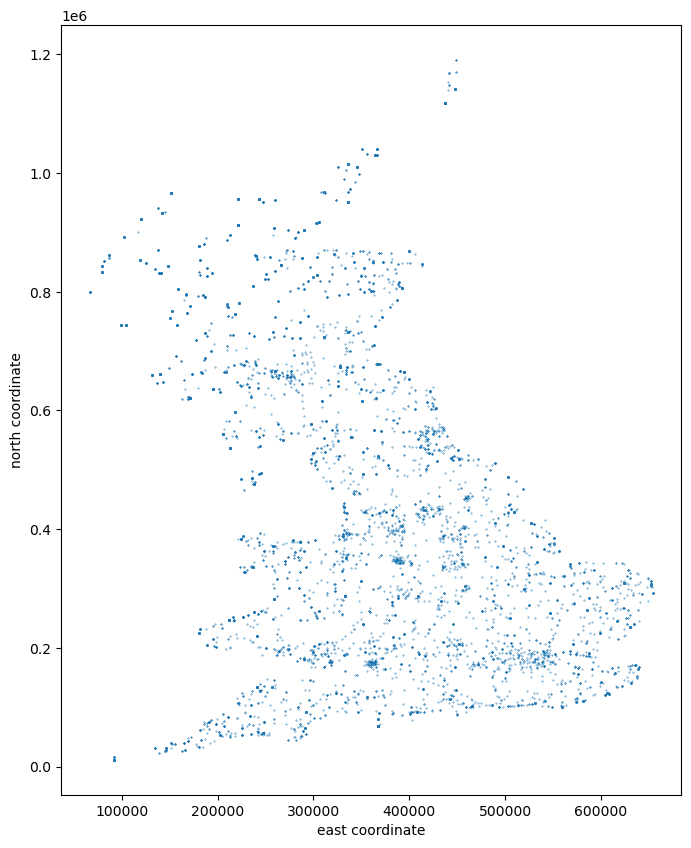

In [488]:
plt.figure(figsize=(8,10))
scatter = plt.scatter(x=samp_geo['birth_east_coord'],y=samp_geo['birth_north_coord'],alpha=1,s=0.1)
plt.xlabel('east coordinate')
plt.ylabel('north coordinate')
plt.show()

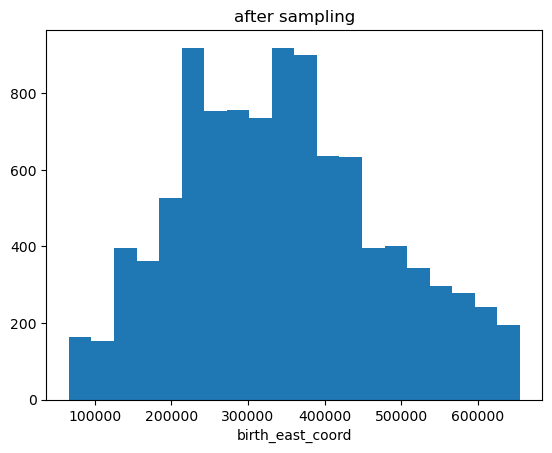

In [489]:
plt.hist(samp_geo['birth_east_coord'],bins=20)
plt.xlabel('birth_east_coord')
plt.title('after sampling')
plt.show()

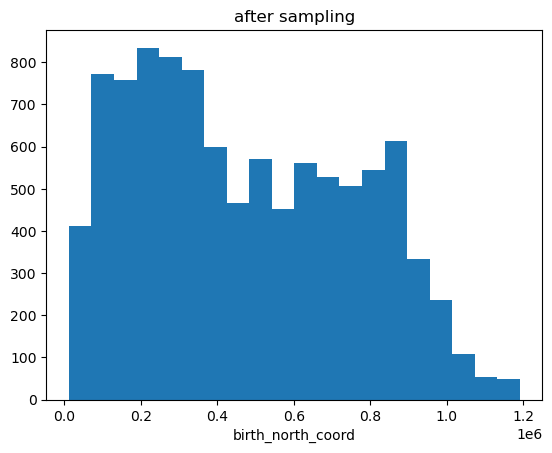

In [490]:
plt.hist(samp_geo['birth_north_coord'],bins=20)
plt.xlabel('birth_north_coord')
plt.title('after sampling')
plt.show()

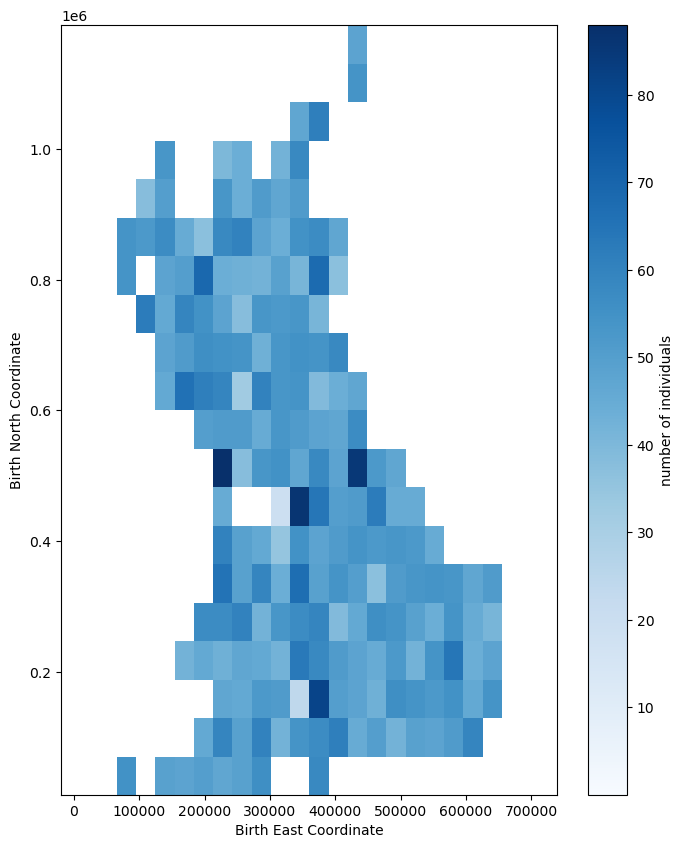

In [491]:
x = samp_geo['birth_east_coord']
y = samp_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plt.figure(figsize=(8, 10))
plt.imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.colorbar(label='number of individuals') 
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.show()

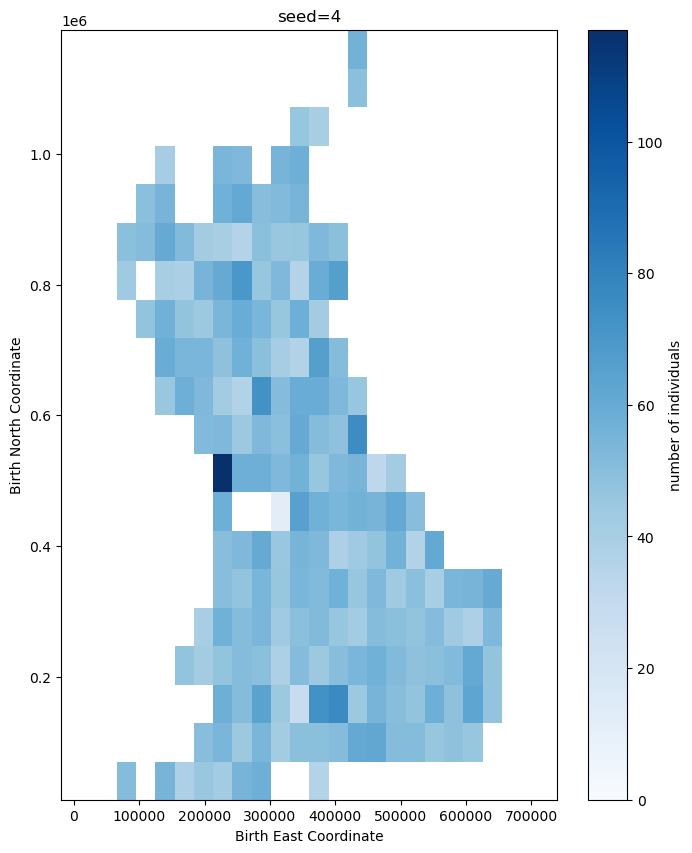

In [576]:
seed=4

samp_geo = df_geo.sample(n=n,replace=True,weights='IS_weights_unif',random_state=seed)

x = samp_geo['birth_east_coord']
y = samp_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plt.figure(figsize=(8, 10))
plt.imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.colorbar(label='number of individuals') 
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.title(f'seed={seed}')

plt.show()

### Gaussian

In [577]:
def gaussian_2d(r, sigma):
    return (1 / (2 * np.pi * sigma ** 2)) * np.exp(-r ** 2 / (2 * sigma ** 2))
    
df_geo['IS_weights_gaus_sd100k']=df_geo.apply(lambda row: gaussian_2d(row['distance_to_centroid_geo'],100000),axis=1)/df_geo['freq_binned']

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6142/3556509084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['IS_weights_gaus_sd100k']=df_geo.apply(lambda row: gaussian_2d(row['distance_to_centroid_geo'],100000),axis=1)/df_geo['freq_binned']


In [578]:
df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo,binned_counts,freq_binned,IS_weights_unif,IS_weights_gaus_sd100k
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,False,44777.226354,False,True,True,True,1911.0,0.008270,120.917321,1.740887e-09
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,False,64536.811201,False,False,True,True,14791.0,0.064010,15.622541,2.018970e-10
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,False,93434.469014,False,False,True,True,11632.0,0.050339,19.865285,2.043362e-10
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,False,74060.785845,False,False,True,True,13493.0,0.058393,17.125398,2.071837e-10
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,False,47201.694885,False,True,True,True,3664.0,0.015856,63.065775,8.979114e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,False,245979.673957,False,False,False,True,662.0,0.002865,349.052870,2.696747e-10
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,False,54451.813560,False,False,True,True,7685.0,0.033258,30.068055,4.126115e-10
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,False,132015.150646,False,False,False,True,204.0,0.000883,1132.710784,7.542146e-09
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,False,163085.866954,False,False,False,True,3806.0,0.016471,60.712822,2.555960e-10


In [579]:
df_geo['IS_weights_gaus_sd100k'].max()

1.7823925865765652e-07

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6142/384656014.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df_geo.iloc[:,3:5].median()[0],df_geo.iloc[:,3:5].median()[1],c='red',marker='*')


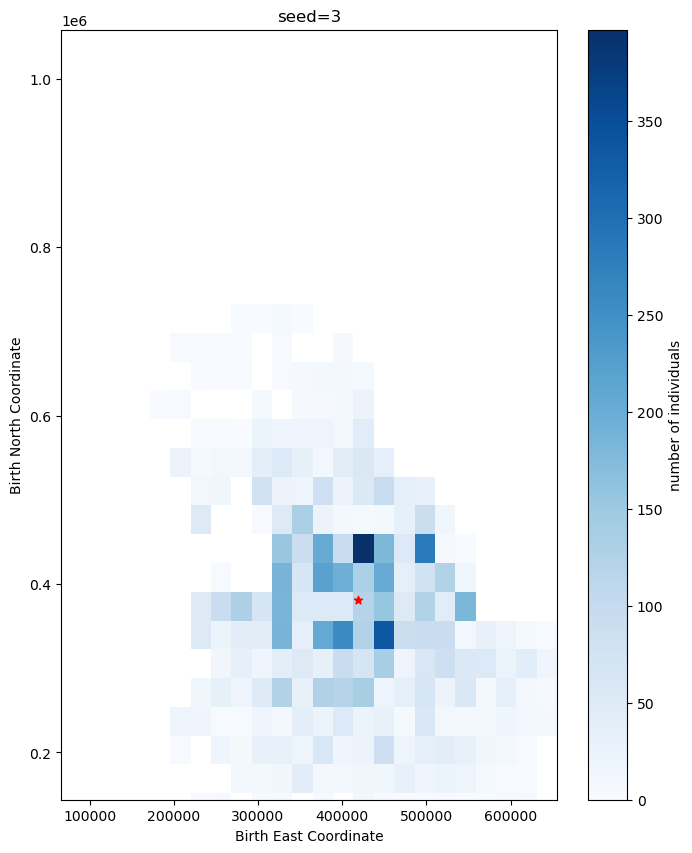

In [580]:
seed=3

samp_geo = df_geo.sample(n=n,replace=True,weights='IS_weights_gaus_sd100k',random_state=seed)

x = samp_geo['birth_east_coord']
y = samp_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plt.figure(figsize=(8, 10))
plt.imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.colorbar(label='number of individuals') 
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.title(f'seed={seed}')
plt.scatter(df_geo.iloc[:,3:5].median()[0],df_geo.iloc[:,3:5].median()[1],c='red',marker='*')
plt.xlim(df_geo['birth_east_coord'].min(),df_geo['birth_east_coord'].max())
plt.ylim(df_geo['birth_north_coord'].min(),df_geo['birth_north_coord'].max())
plt.show()

In [515]:
# samp_geo = df_geo.sample(n=n,replace=True,weights='IS_weights_gaus_sd100k',random_state=0)

In [516]:
# samp_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo,binned_counts,freq_binned,IS_weights_unif,IS_weights_gaus_sd10,IS_weights_gaus_sd100k
260936,3645804,1.0,1.0,351500.0,385500.0,Liverpool,England,0.000379,-0.000232,-0.000028,...,67186.308129,False,False,True,True,13493.0,0.058393,17.125398,2.174906e-10,2.174906e-10
338462,5286754,1.0,1.0,449500.0,423500.0,Leeds,England,0.000350,-0.000239,0.000105,...,53009.433123,False,False,True,True,1911.0,0.008270,120.917321,1.672208e-09,1.672208e-09
285821,5792417,1.0,1.0,376500.0,198500.0,Bristol,England,0.000356,-0.000127,0.000221,...,186783.296898,False,False,False,True,916.0,0.003964,252.263100,7.016016e-10,7.016016e-10
258953,3474736,1.0,1.0,367500.0,523500.0,Croydon,England,0.000335,-0.000140,0.000472,...,151822.264507,False,False,False,True,85.0,0.000368,2718.505882,1.366552e-08,1.366552e-08
200441,3467968,1.0,1.0,486500.0,362500.0,Nottingham,England,0.000354,-0.000259,0.000201,...,70342.021580,False,False,True,True,495.0,0.002142,466.814141,5.801225e-09,5.801225e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261741,3715122,1.0,1.0,614500.0,157500.0,Leeds,England,0.000275,-0.000186,0.000055,...,296892.236342,False,False,False,True,456.0,0.001973,506.739035,9.830150e-11,9.830150e-11
188435,2435038,1.0,1.0,274500.0,197500.0,Reading,Wales,0.000427,-0.000187,-0.000085,...,232862.620444,False,False,False,True,995.0,0.004306,232.234171,2.456209e-10,2.456209e-10
357735,1953246,1.0,1.0,368500.0,427500.0,Bristol,England,0.000342,-0.000158,0.000143,...,68622.153857,False,False,True,True,1590.0,0.006881,145.328931,1.827753e-09,1.827753e-09
11286,1999823,1.0,1.0,458500.0,304500.0,Oxford,England,0.000394,-0.000180,0.000155,...,85883.642214,False,False,True,True,1741.0,0.007534,132.724296,1.460840e-09,1.460840e-09


In [581]:
# plt.figure(figsize=(8,10))
# scatter = plt.scatter(x=samp_geo['birth_east_coord'],y=samp_geo['birth_north_coord'],alpha=1,s=0.1)
# plt.xlabel('east coordinate')
# plt.ylabel('north coordinate')
# plt.show()

In [582]:
# plt.hist(samp_geo['birth_east_coord'],bins=500)
# plt.show()